## Support Vector Regressor Implementation

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [3]:
X

array([[ 0.05674211,  0.9340346 ],
       [-1.50482585, -0.55056159],
       [-0.90600263,  0.16435994],
       ...,
       [ 1.18858556, -0.48329019],
       [ 2.17239941,  0.48415151],
       [-1.85764709, -0.20732928]])

In [4]:
y

array([ 2.29969025e+01, -2.70588769e+01, -2.73726598e+00, -4.90325212e+01,
       -9.64866887e+00, -2.79771745e+01,  7.26515018e+00,  2.60418295e+00,
       -2.36002540e+01,  2.85681119e+01, -1.33091490e+01, -2.40630026e+01,
       -1.03501686e+01,  4.97130316e+01, -2.09162483e+01,  2.04307924e+01,
        2.87028909e+01,  9.71735807e+00, -3.22833149e+01,  7.67043533e+00,
        2.78310270e+01, -2.34783465e+01, -9.61822863e+00,  7.74139498e+00,
       -2.78448751e+01,  1.07352079e+01,  4.74950246e+01, -5.11573360e+01,
       -1.35609014e+01, -2.32293331e+01, -3.84032765e+01, -4.69990260e+00,
        1.73913441e+01, -1.60899497e+01, -1.20053742e+01,  2.49301530e+01,
       -2.19061964e+01,  2.59001597e+01,  3.04241978e+01, -5.91144456e+00,
        4.42568673e-01, -2.94234084e+00,  1.20118278e+01, -1.06826936e+00,
        4.52554964e+00, -3.03673247e+01,  3.51418481e+01,  3.56931022e+01,
       -1.86378565e+01,  4.11254354e+01, -7.67039908e+01, -6.62058445e+01,
       -2.21201645e+01, -

<Axes: xlabel='0', ylabel='1'>

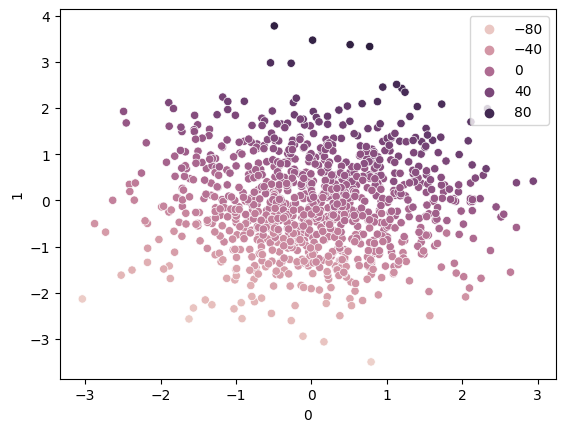

In [5]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.25)

In [7]:
from sklearn.svm import SVR

In [9]:
svr = SVR(kernel='linear')

In [10]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [11]:
svr.coef_

array([[ 9.74780788, 25.97245584]])

In [12]:
y_pred = svr.predict(X_test)

In [13]:
y_pred

array([-18.43854812, -25.73862375,  21.56178943, -75.41007977,
        -9.04995962, -41.19728015,  39.57394269,  39.1902479 ,
       -21.2368184 ,  24.43558508,  -9.76141148, -22.49273156,
       -15.57766696,   0.70645499,  18.19624655,  23.59098095,
        11.55432229, -25.52002584,  -8.31973339,  21.73985671,
       -25.39484471, -68.66781146,  14.52917596,  16.2838623 ,
        36.50054818,  21.95785934,   3.8233453 ,  -0.52674776,
         5.61806437, -37.32374477,  14.63335178,  33.83098252,
        24.20940563, -22.64407197,  20.83495029, -15.82222288,
        -1.52583   , -40.95936625,  16.94743832,  23.93591238,
        71.10152801, -19.96869099,   7.28604036, -48.53629952,
       -24.35226121, -16.28160453,  -3.45741649,   6.08074228,
       -42.94859075,   1.49708095, -52.97286405, -12.78660578,
        18.39821146,  -0.82622579,  -2.76563193, -55.94996439,
        -9.81244871,  13.56988952,  -3.47368031,  -6.3615248 ,
        35.84835298, -20.78681538, -44.80131535,  -7.76

In [14]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9892602589632741


## Hyperparametere Tuning With SVR

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [16]:
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=5)

In [17]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']})

In [18]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [19]:
y_pred2 = grid.predict(X_test)
print(r2_score(y_test, y_pred2))

0.9894045497592044
